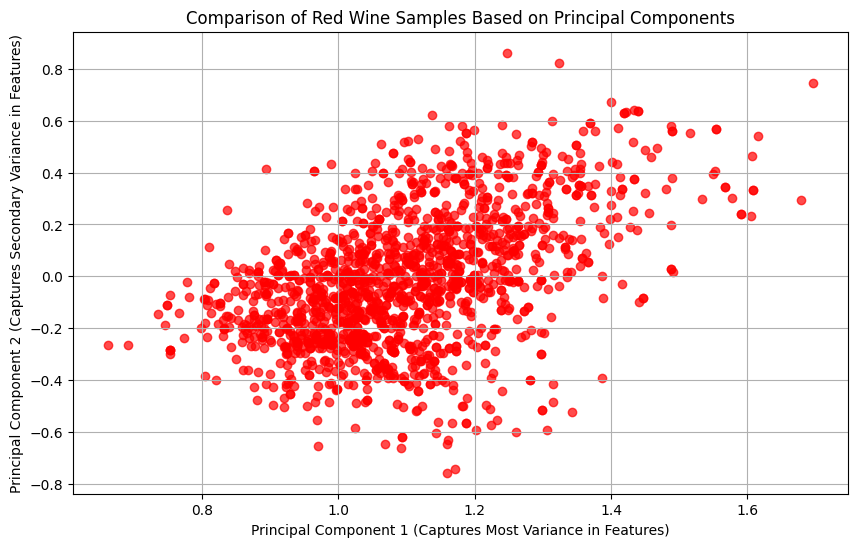

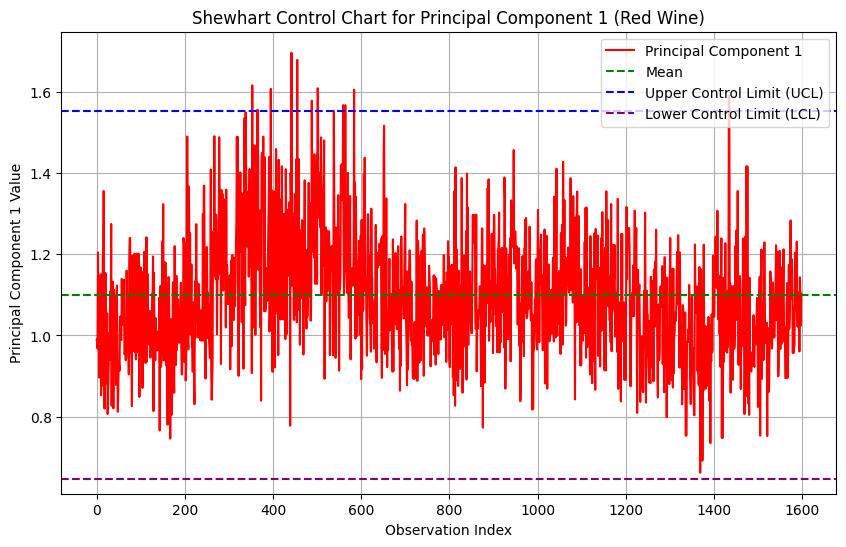

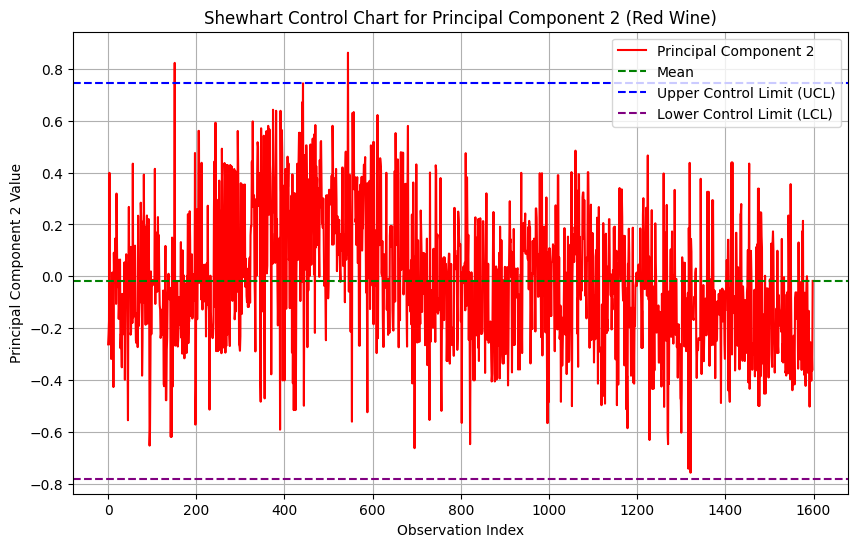

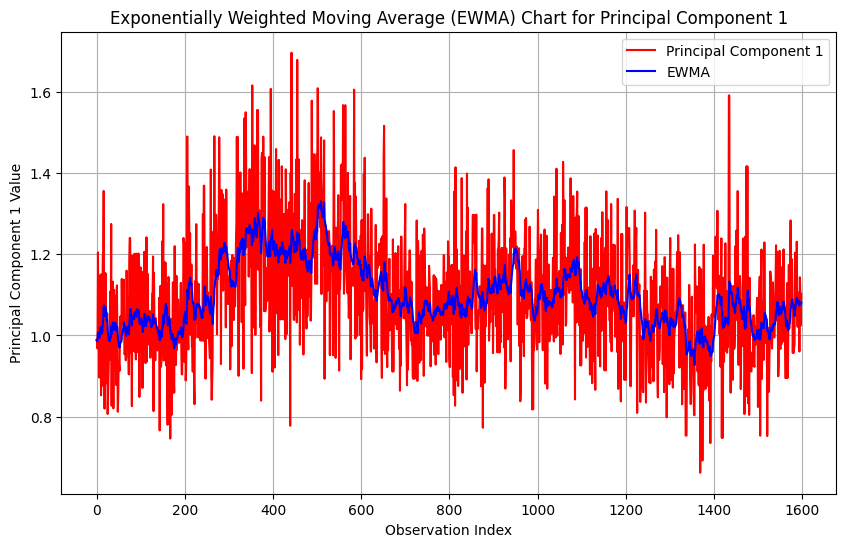

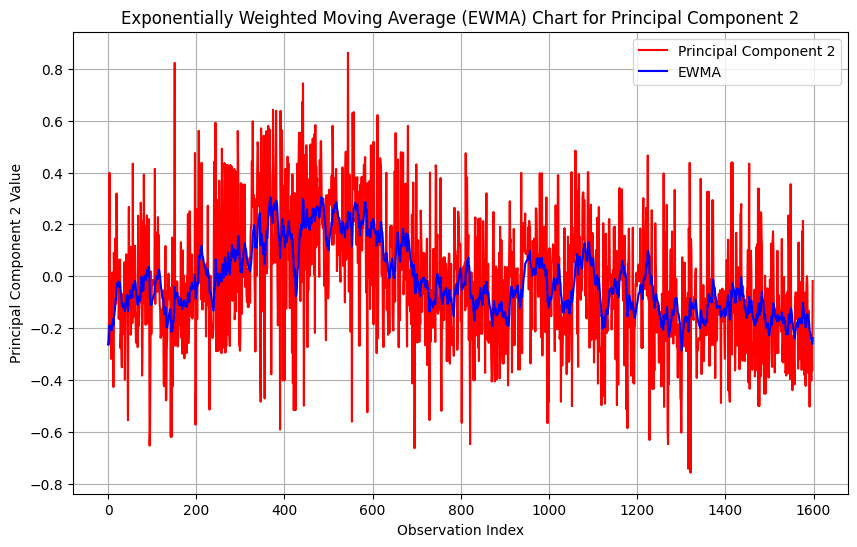

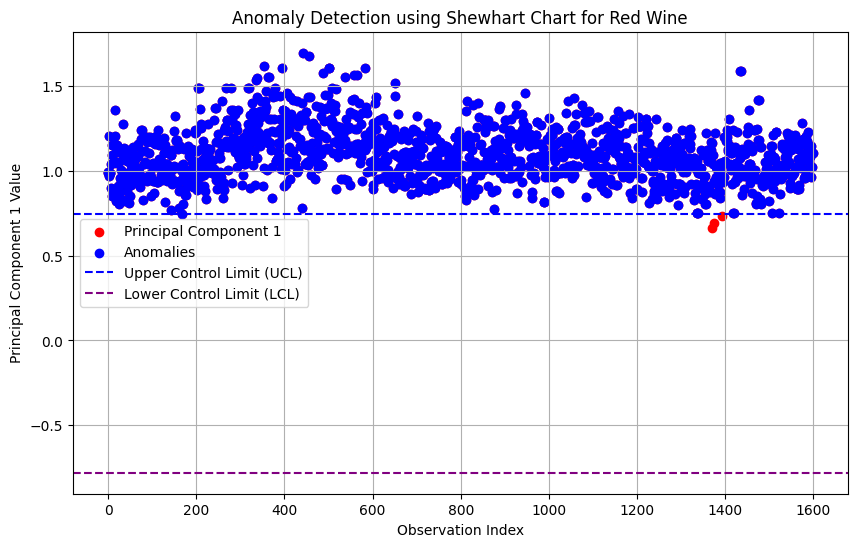

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load the red wine dataset
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# Normalize numeric variables
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(red_wine)
scaled_df = pd.DataFrame(scaled_data, columns=red_wine.columns)

# Apply SVD to reduce dimensions
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(scaled_data)
svd_df = pd.DataFrame(svd_result, columns=['Principal Component 1', 'Principal Component 2'])

# Create a scatter plot for the first two components
plt.figure(figsize=(10, 6))
plt.scatter(
    svd_df['Principal Component 1'],
    svd_df['Principal Component 2'],
    alpha=0.7, c='red'
)
plt.title('Comparison of Red Wine Samples Based on Principal Components')
plt.xlabel('Principal Component 1 (Captures Most Variance in Features)')
plt.ylabel('Principal Component 2 (Captures Secondary Variance in Features)')
plt.grid(True)
plt.show()

# Shewhart Control Chart for Principal Component 1
component_1 = svd_df['Principal Component 1']
mean = component_1.mean()
std_dev = component_1.std()
ucl = mean + 3 * std_dev
lcl = mean - 3 * std_dev

plt.figure(figsize=(10, 6))
plt.plot(component_1, label='Principal Component 1', color='red')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(ucl, color='blue', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(lcl, color='purple', linestyle='--', label='Lower Control Limit (LCL)')
plt.title('Shewhart Control Chart for Principal Component 1 (Red Wine)')
plt.xlabel('Observation Index')
plt.ylabel('Principal Component 1 Value')
plt.legend()
plt.grid(True)
plt.show()

# Shewhart Control Chart for Principal Component 2
component_2 = svd_df['Principal Component 2']
mean = component_2.mean()
std_dev = component_2.std()
ucl = mean + 3 * std_dev
lcl = mean - 3 * std_dev

plt.figure(figsize=(10, 6))
plt.plot(component_2, label='Principal Component 2', color='red')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(ucl, color='blue', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(lcl, color='purple', linestyle='--', label='Lower Control Limit (LCL)')
plt.title('Shewhart Control Chart for Principal Component 2 (Red Wine)')
plt.xlabel('Observation Index')
plt.ylabel('Principal Component 2 Value')
plt.legend()
plt.grid(True)
plt.show()

# EWMA Chart for Principal Component 1
ewma = pd.Series(component_1).ewm(span=20, adjust=False).mean()

plt.figure(figsize=(10, 6))
plt.plot(component_1, label='Principal Component 1', color='red')
plt.plot(ewma, color='blue', label='EWMA')
plt.title('Exponentially Weighted Moving Average (EWMA) Chart for Principal Component 1')
plt.xlabel('Observation Index')
plt.ylabel('Principal Component 1 Value')
plt.legend()
plt.grid(True)
plt.show()

# EWMA Chart for Principal Component
ewma = pd.Series(component_2).ewm(span=20, adjust=False).mean()

plt.figure(figsize=(10, 6))
plt.plot(component_2, label='Principal Component 2', color='red')
plt.plot(ewma, color='blue', label='EWMA')
plt.title('Exponentially Weighted Moving Average (EWMA) Chart for Principal Component 2')
plt.xlabel('Observation Index')
plt.ylabel('Principal Component 2 Value')
plt.legend()
plt.grid(True)
plt.show()



# Highlight anomalies in Shewhart Chart
anomalies = (component_2 > ucl) | (component_2 < lcl)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(component_2)), component_2, label='Principal Component 2', color='red')
plt.scatter(np.where(anomalies)[0], component_2[anomalies], color='blue', label='Anomalies')
plt.axhline(ucl, color='blue', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(lcl, color='purple', linestyle='--', label='Lower Control Limit (LCL)')
plt.title('Anomaly Detection using Shewhart Chart for Red Wine')
plt.xlabel('Observation Index')
plt.ylabel('Principal Component 2 Value')
plt.legend()
plt.grid(True)
plt.show()


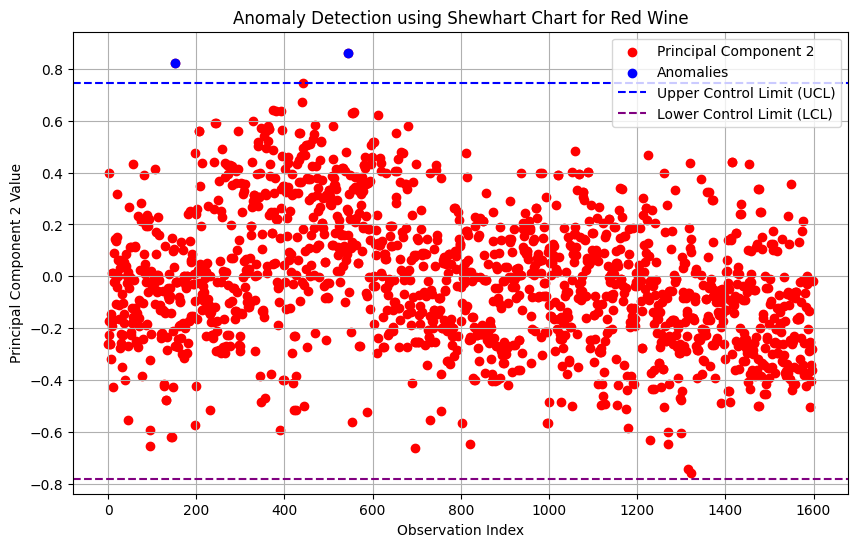

In [ ]:
# Highlight anomalies in Shewhart Chart
anomalies = (component_2 > ucl) | (component_2 < lcl)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(component_2)), component_2, label='Principal Component 2', color='red')
plt.scatter(np.where(anomalies)[0], component_2[anomalies], color='blue', label='Anomalies')
plt.axhline(ucl, color='blue', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(lcl, color='purple', linestyle='--', label='Lower Control Limit (LCL)')
plt.title('Anomaly Detection using Shewhart Chart for Red Wine')
plt.xlabel('Observation Index')
plt.ylabel('Principal Component 2 Value')
plt.legend()
plt.grid(True)
plt.show()